In [1]:
import csv
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# reading data from file
with open(r"data\BankNote_Authentication.csv") as f:
    reader = csv.reader(f)
    next(reader)
    
    data = []
    for row in reader:
        data.append({
            "feature": [float(cell) for cell in row[:4]],
            "label": 1 if row[4] == "0" else 0
        })

In [3]:
# performing train, test split
feature = [row["feature"] for row in data]
label = [row["label"] for row in data]

x_training, x_testing, y_training, y_testing = train_test_split(feature, label, test_size=0.30)

In [4]:
# preparing neural network
model = tf.keras.models.Sequential()
# hidden layer with 8 artificial neurons each with ReLu activation getting 4 inputs from features
model.add(tf.keras.layers.Dense(8, input_shape=(4,), activation="relu"))
# output layer to return probablity between 0 and 1 hence with sigmoid activation
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [5]:
# compiling the model
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [6]:
# training the model
history = model.fit(x_training, y_training, epochs=20, validation_data=(x_testing,  y_testing))

Epoch 1/20
30/30 [==============================] - 0s 7ms/step - loss: 0.6228 - accuracy: 0.6958 - val_loss: 0.4648 - val_accuracy: 0.7597
Epoch 2/20
30/30 [==============================] - 0s 3ms/step - loss: 0.4730 - accuracy: 0.7750 - val_loss: 0.3882 - val_accuracy: 0.8495
Epoch 3/20
30/30 [==============================] - 0s 2ms/step - loss: 0.4238 - accuracy: 0.8240 - val_loss: 0.3565 - val_accuracy: 0.8568
Epoch 4/20
30/30 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.8333 - val_loss: 0.3286 - val_accuracy: 0.8762
Epoch 5/20
30/30 [==============================] - 0s 2ms/step - loss: 0.3586 - accuracy: 0.8500 - val_loss: 0.3023 - val_accuracy: 0.8811
Epoch 6/20
30/30 [==============================] - 0s 2ms/step - loss: 0.3294 - accuracy: 0.8625 - val_loss: 0.2789 - val_accuracy: 0.8883
Epoch 7/20
30/30 [==============================] - 0s 2ms/step - loss: 0.3038 - accuracy: 0.8687 - val_loss: 0.2566 - val_accuracy: 0.8981
Epoch 8/20
30/30 [==

13/13 - 0s - loss: 0.1091 - accuracy: 0.9806 - 43ms/epoch - 3ms/step


[0.10914500057697296, 0.9805825352668762]

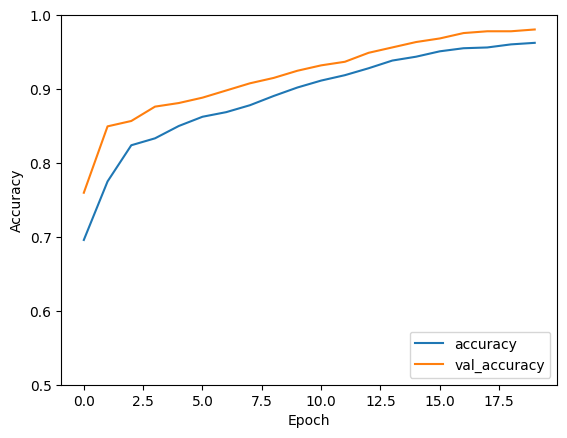

In [7]:
# plotting evaluation graph
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluating the model and storing results
model.evaluate(x_testing,  y_testing, verbose=2)